In [44]:
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
mat = scipy.io.loadmat('ECG/ecg.mat')

In [87]:
data = mat['mts']

In [141]:
train_labels = data['trainlabels'][0][0]
train = data['train'][0][0][0].reshape(100,1)
test_labels = data['testlabels'][0][0]
test = data['test'][0][0][0].reshape(100,1)

In [142]:
df_train = list()
for i in range(100):
    channel_1 = train[i][0][0]
    channel_2 = train[i][0][1]
    temp = np.stack((channel_1, channel_2), axis=-1)
    df_train.append(temp)

In [143]:
len_ecg_train = []
for i, ecg in enumerate(train):
    len_ecg_train.append(np.shape(ecg[0])[1])
pd.Series(len_ecg_train).describe()

count    100.000000
mean      90.200000
std       17.015145
min       54.000000
25%       74.750000
50%       96.000000
75%      100.000000
max      147.000000
dtype: float64

In [164]:
#Padding the sequence with the values in last row to max length
to_pad = np.max(len_ecg_train)
new_seq = []
for one_seq in df_train:
    len_one_seq = len(one_seq)
    last_val = one_seq[-1]
    n = to_pad - len_one_seq
    
    to_concat = np.repeat(np.zeros(len(one_seq[-1])), n).reshape(2, n).transpose()
    new_one_seq = np.concatenate([one_seq, to_concat])
    new_seq.append(new_one_seq)

final_seq = np.stack(new_seq)
np.shape(final_seq)

(100, 147, 2)

#### Descriptive statistics

For 2nd dim in each class

In [169]:
cn_2_cls_1 = final_seq[np.concatenate(train_labels)==1,:,0]

In [170]:
np.mean(cn_2_cls_1)

-2.204281712685074

In [171]:
np.median(cn_2_cls_1)

0.0

In [172]:
np.var(cn_2_cls_1)

8440.657548693747

In [173]:
np.std(cn_2_cls_1)

91.87305126474111

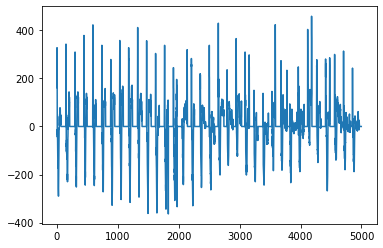

In [174]:
plt.plot(np.concatenate(cn_2_cls_1))

(array([2.00e+00, 8.00e+00, 4.30e+01, 4.74e+02, 3.94e+03, 3.30e+02,
        6.20e+01, 5.40e+01, 5.90e+01, 2.60e+01]),
 array([-346., -273., -200., -127.,  -54.,   19.,   92.,  165.,  238.,
         311.,  384.]),
 <BarContainer object of 10 artists>)

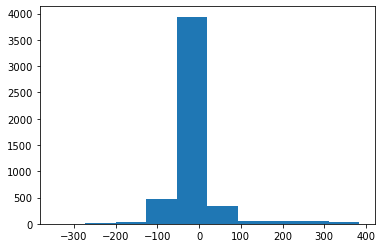

In [154]:
plt.hist(np.concatenate(cn_2_cls_1))

#### Truncate the sequence to length 105

In [55]:
np.percentile(pd.Series(len_ecg_train),90)

105.10000000000001

The 90th quartile comes out to be 60, which is taken as the length of sequence for the data. 

length 39-152

In [56]:
#Padding the sequence with the values in last row to max length
to_pad = np.max(len_ecg_train)
new_seq = []
for one_seq in df_train:
    len_one_seq = len(one_seq)
    last_val = one_seq[-1]
    n = to_pad - len_one_seq
    
    to_concat = np.repeat(one_seq[-1], n).reshape(2, n).transpose()
    new_one_seq = np.concatenate([one_seq, to_concat])
    new_seq.append(new_one_seq)

final_seq = np.stack(new_seq)
#truncate the sequence to length 105
from keras.preprocessing import sequence
seq_len = 105
final_seq = sequence.pad_sequences(final_seq, maxlen=seq_len, padding = 'post', dtype='float',truncating='post')

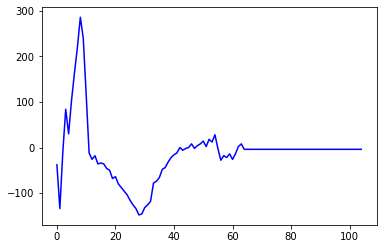

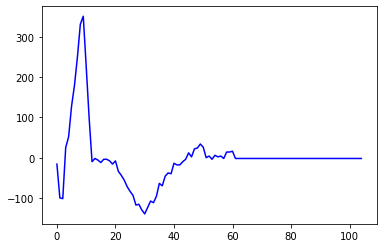

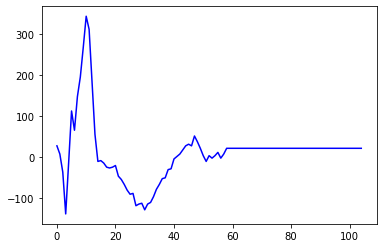

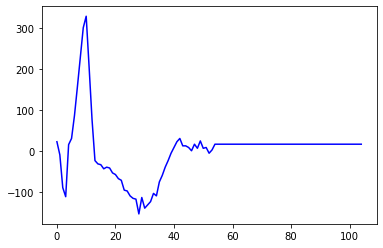

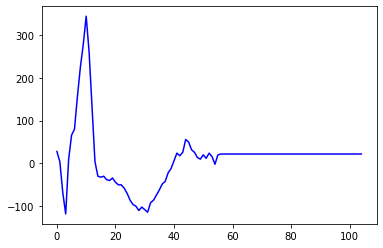

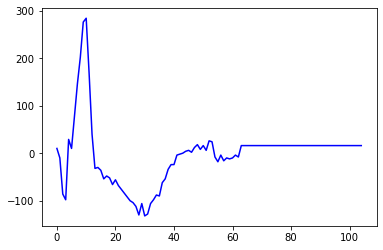

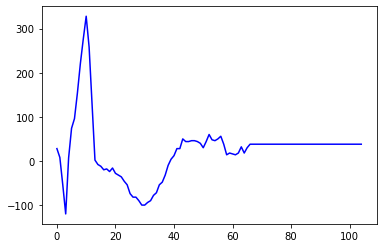

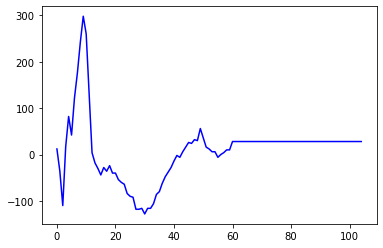

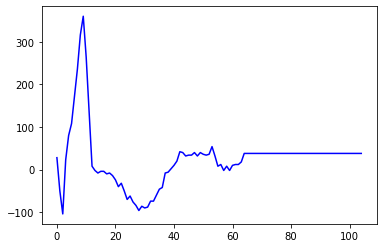

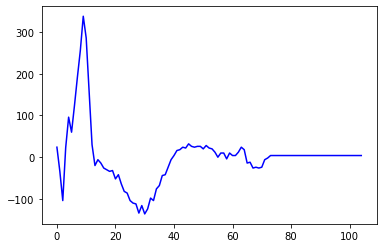

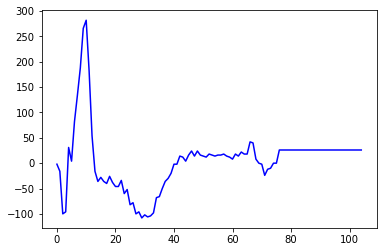

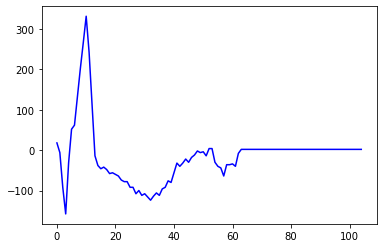

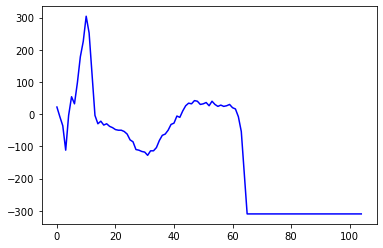

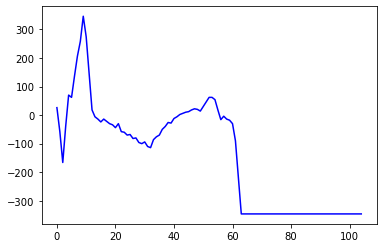

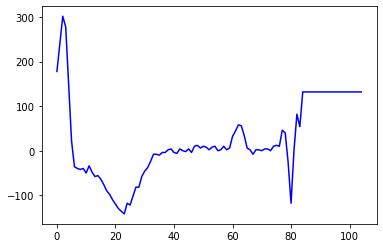

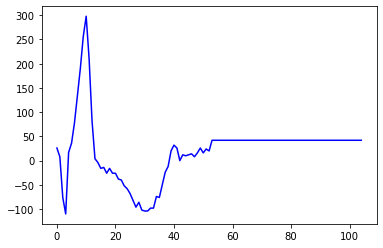

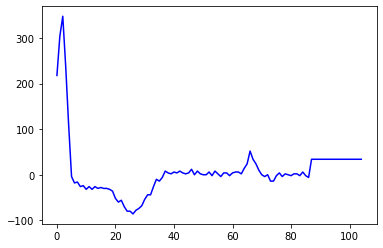

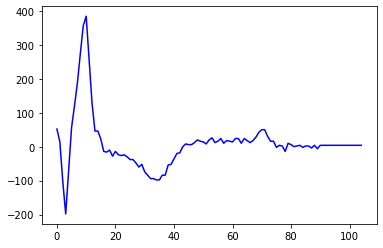

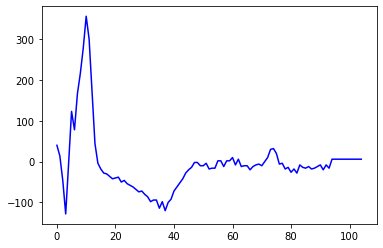

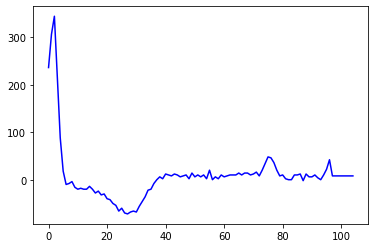

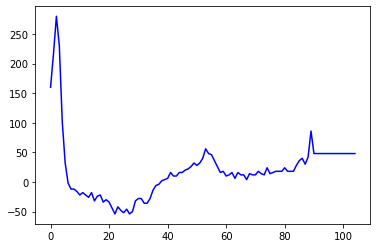

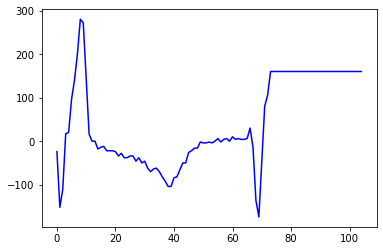

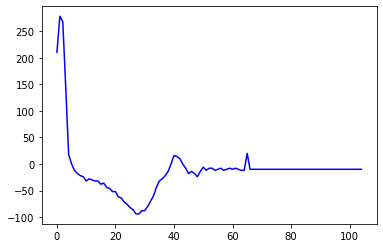

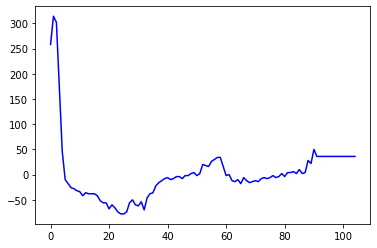

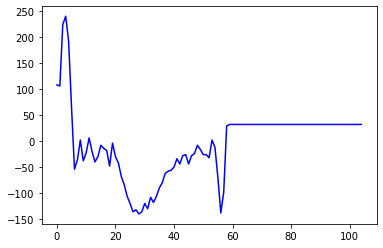

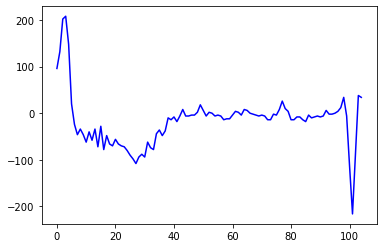

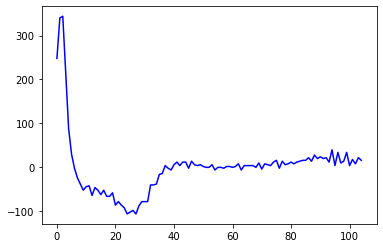

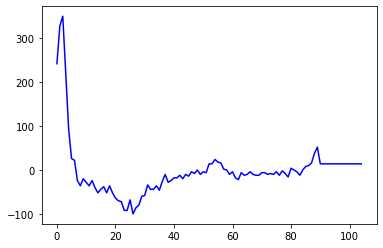

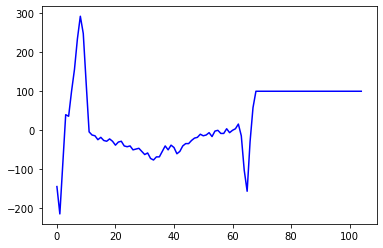

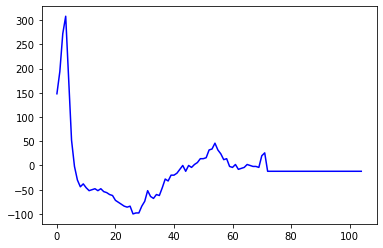

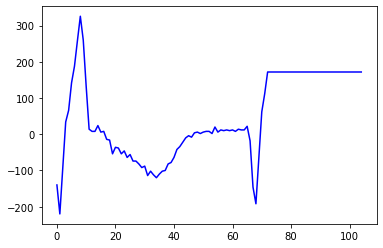

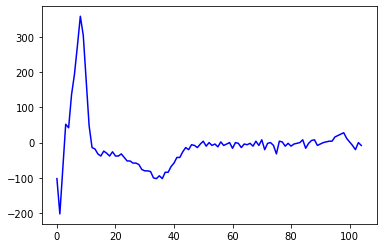

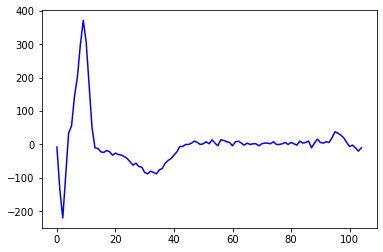

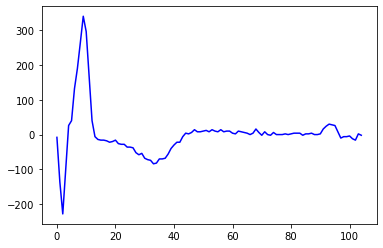

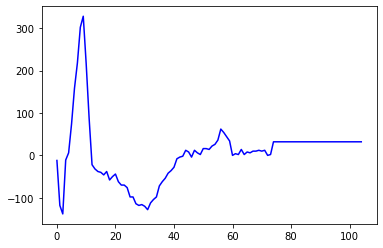

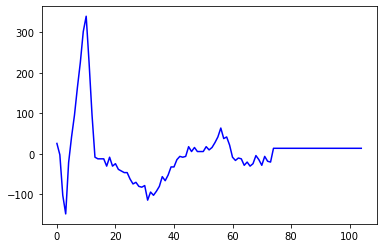

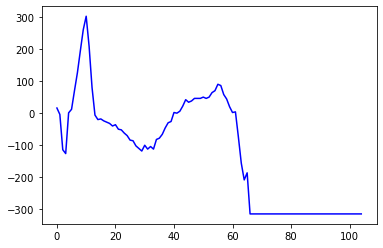

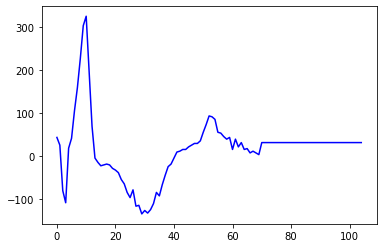

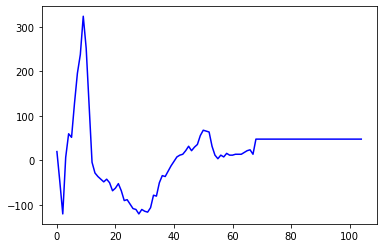

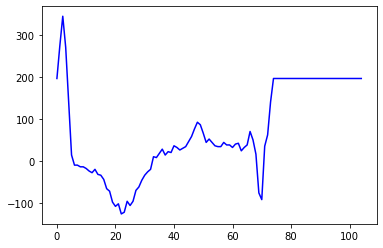

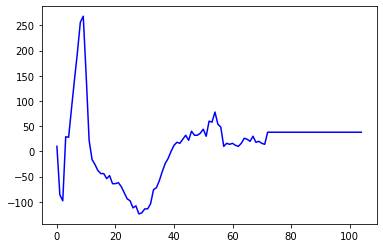

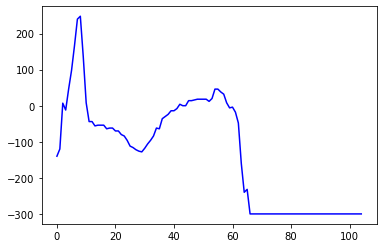

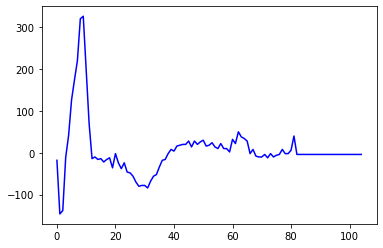

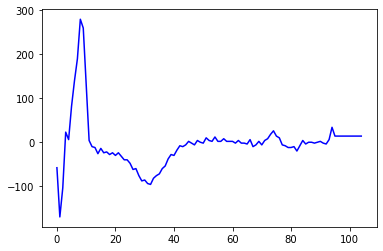

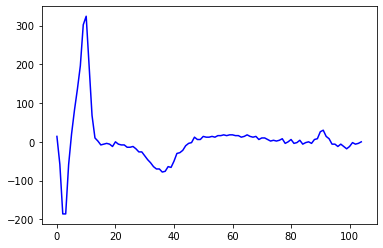

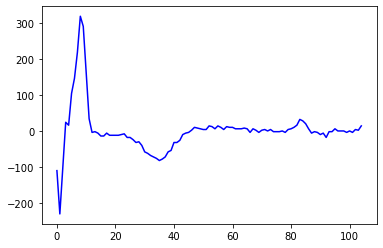

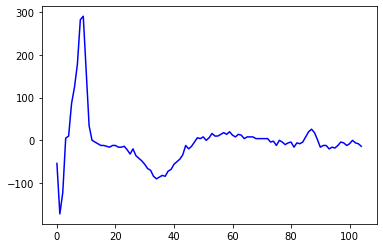

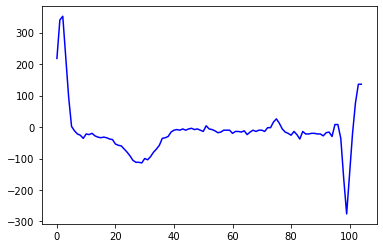

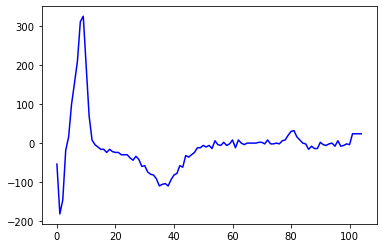

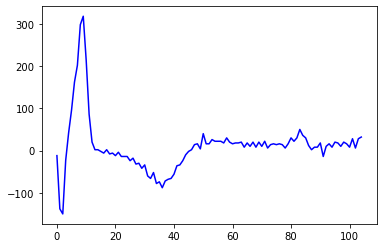

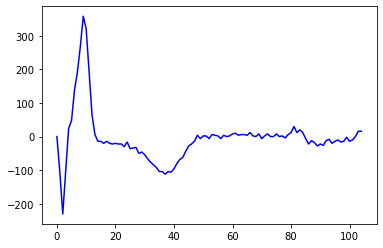

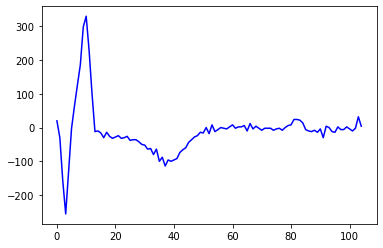

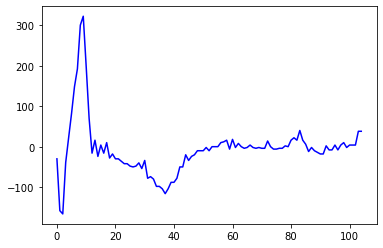

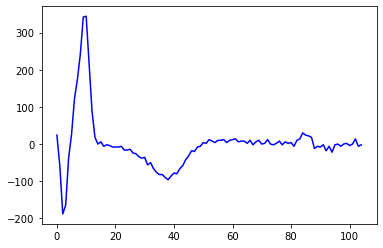

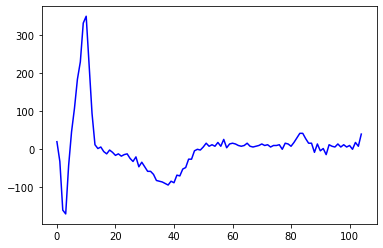

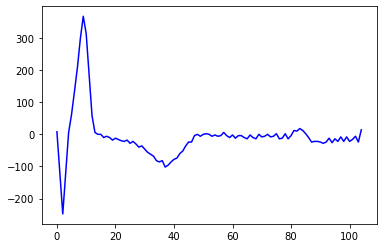

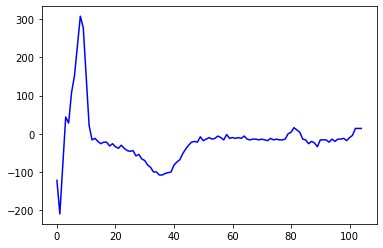

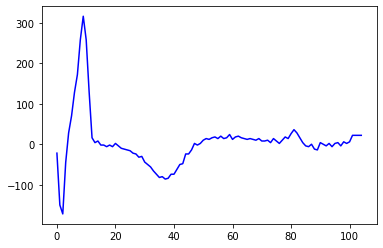

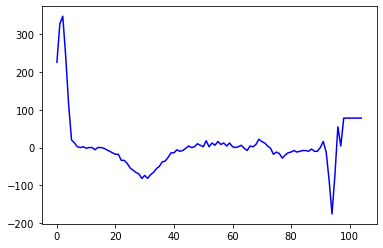

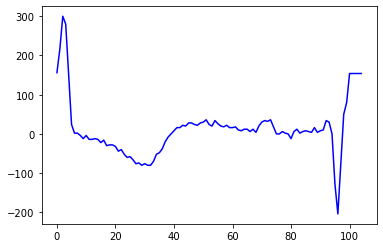

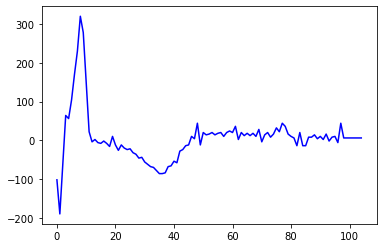

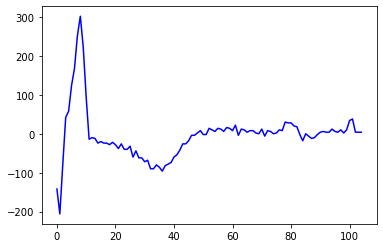

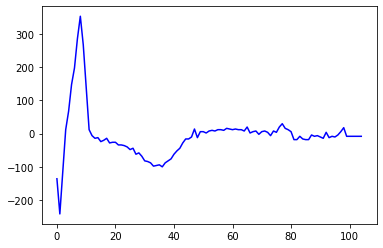

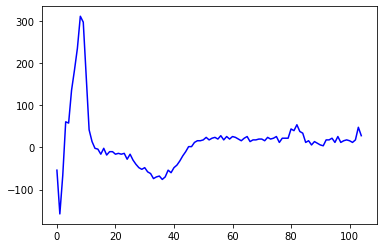

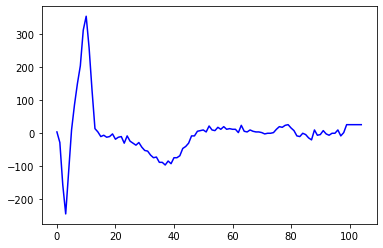

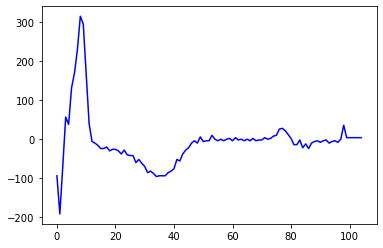

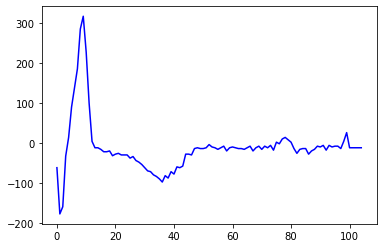

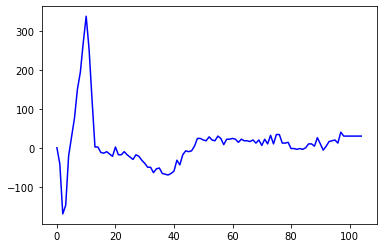

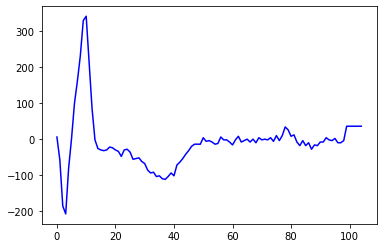

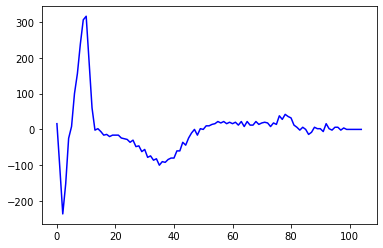

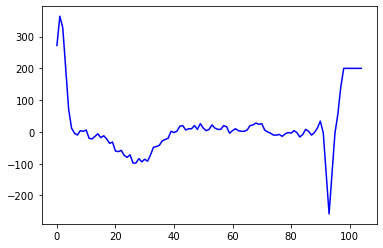

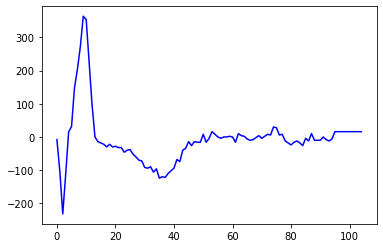

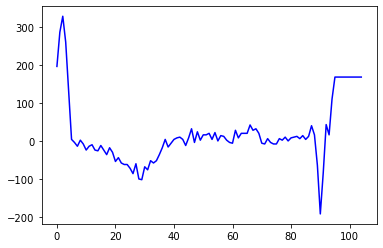

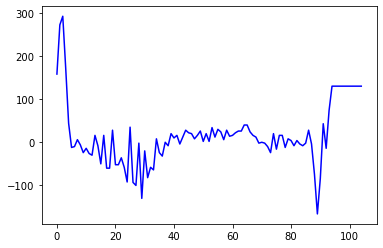

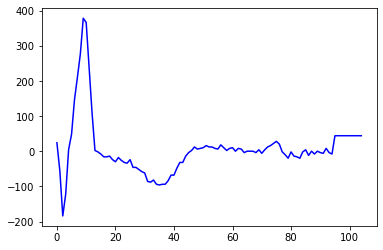

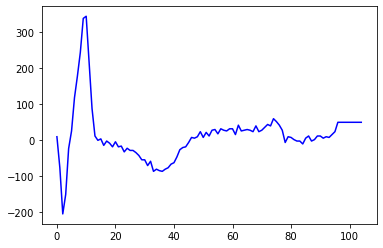

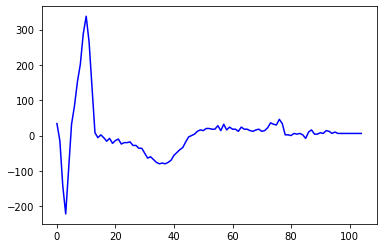

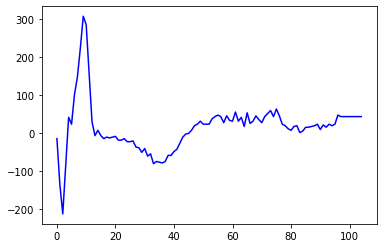

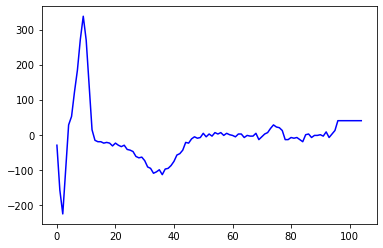

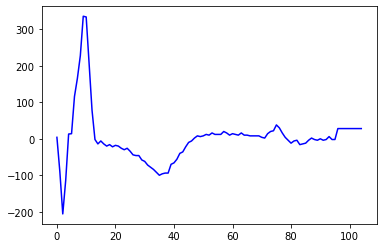

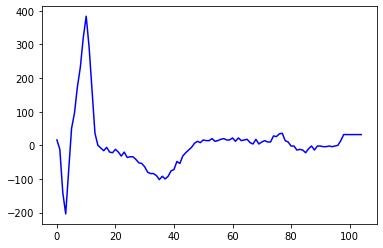

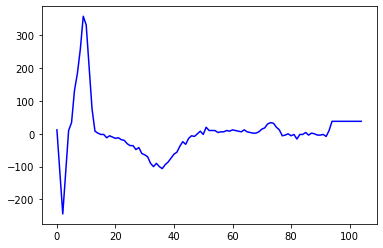

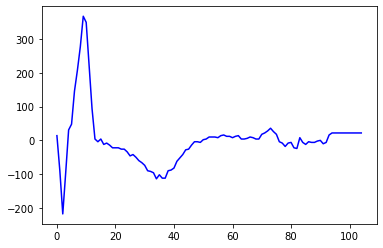

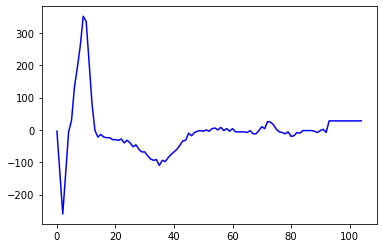

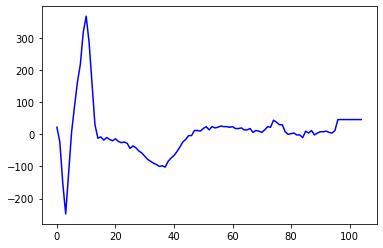

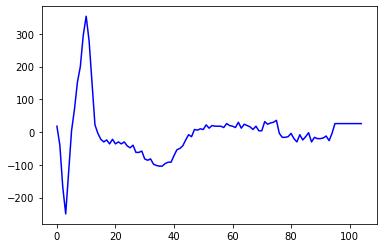

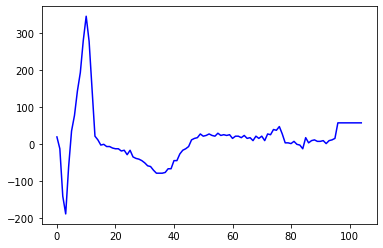

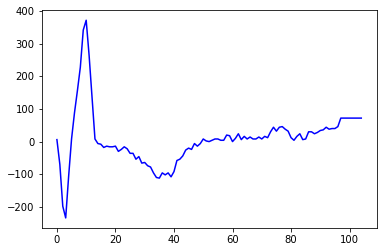

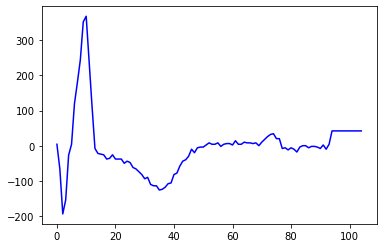

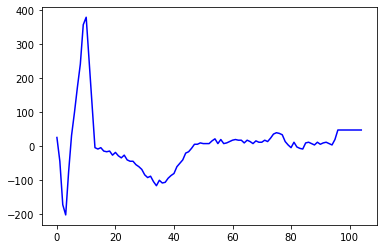

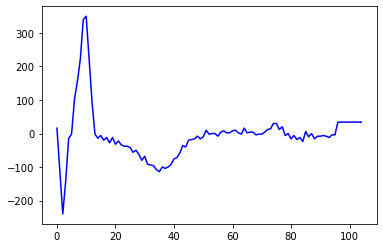

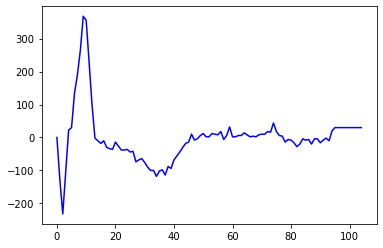

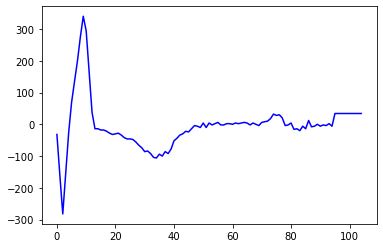

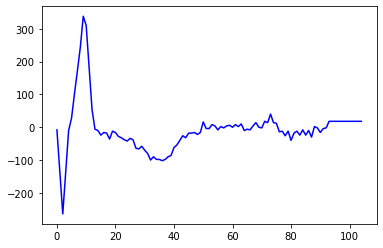

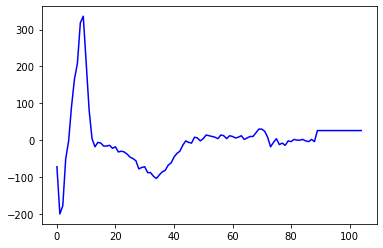

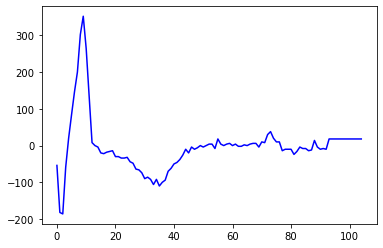

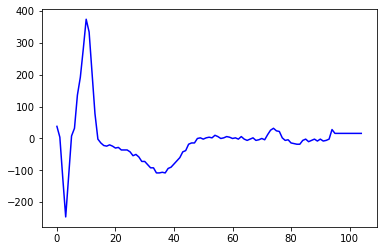

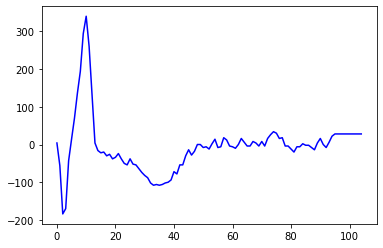

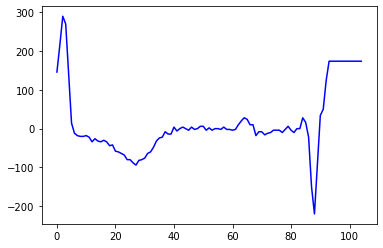

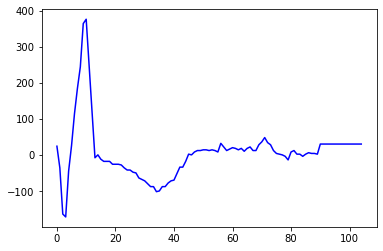

In [57]:
for i in range(100):
    plt.plot(final_seq[i][:,1].reshape(105,1), 'b')
    plt.show()

In [58]:
def plot_time_series_class(data, class_name, ax, n_steps=1):
    time_series_df = pd.DataFrame(data)
    smooth_path = time_series_df.rolling(n_steps).mean()
    path_deviation = 2 * time_series_df.rolling(n_steps).std()

    under_line = (smooth_path - path_deviation)[0]
    over_line = (smooth_path + path_deviation)[0]

    ax.plot(smooth_path, linewidth=2)
    ax.fill_between(
        path_deviation.index,
        under_line,
        over_line,
        alpha=.105
    )
    ax.set_title("Channel "+str(class_name))

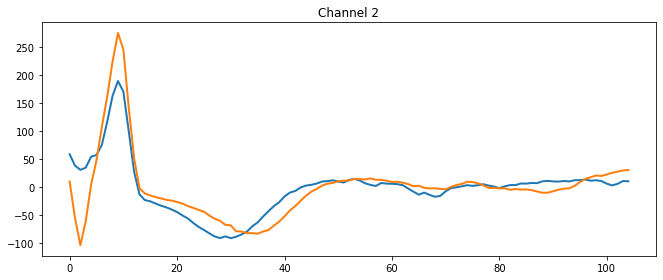

In [59]:
classes = np.unique(train_labels)

fig, axs = plt.subplots(
  nrows=1,
  ncols=2,
  figsize=(18, 4)
)

for i, cls in enumerate(classes):
    ax = axs.flat[0]
    data = final_seq[np.concatenate(train_labels)==cls,:,1] \
    .mean(axis=0) 
    plot_time_series_class(data, 2, ax)

fig.delaxes(axs.flat[-1])
fig.tight_layout();

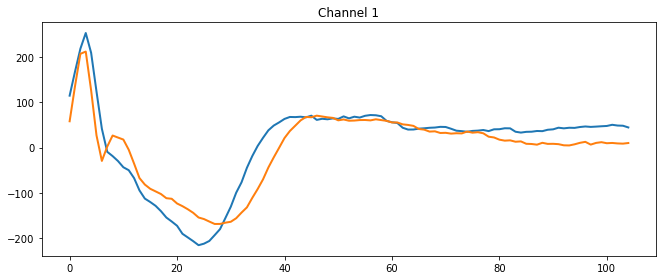

In [60]:
fig, axs = plt.subplots(
  nrows=1,
  ncols=2,
  figsize=(18, 4)
)
for i, cls in enumerate(classes):
    ax = axs.flat[0]
    data = final_seq[np.concatenate(train_labels)==cls,:,0] \
    .mean(axis=0) 
    plot_time_series_class(data, 1, ax)

fig.delaxes(axs.flat[-1])
fig.tight_layout();

### Test

In [61]:
df_test = list()
for i in range(100):
    channel_1 = test[i][0][0]
    channel_2 = test[i][0][1]
    temp = np.stack((channel_1, channel_2), axis=-1)
    df_test.append(temp)

In [62]:
len_ecg_test = []
for i, ecg in enumerate(test):
    len_ecg_test.append(np.shape(ecg[0])[1])
pd.Series(len_ecg_test).describe()

count    100.000000
mean      88.870000
std       21.425301
min       39.000000
25%       70.500000
50%       94.000000
75%      100.000000
max      152.000000
dtype: float64

In [63]:
#Padding the sequence with the values in last row to max length
to_pad = np.max(len_ecg_test)
new_seq = []
for one_seq in df_test:
    len_one_seq = len(one_seq)
    last_val = one_seq[-1]
    n = to_pad - len_one_seq
    
    to_concat = np.repeat(one_seq[-1], n).reshape(2, n).transpose()
    new_one_seq = np.concatenate([one_seq, to_concat])
    new_seq.append(new_one_seq)

final_seq_test = np.stack(new_seq)
#truncate the sequence to length 105
from keras.preprocessing import sequence
seq_len = 105
final_seq_test = sequence.pad_sequences(final_seq_test, maxlen=seq_len, padding = 'post', dtype='float',truncating='post')

In [78]:
cn_t_2 = final_seq_test[np.concatenate(test_labels)==2,:,1]

In [79]:
np.mean(cn_t_2)

-5.704477611940298

In [80]:
np.median(cn_t_2)

0.0

In [81]:
np.var(cn_t_2)

7937.953178245235

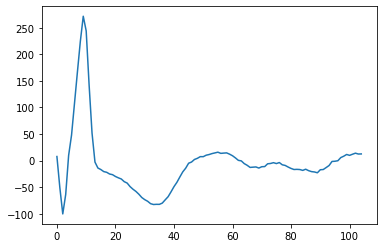

In [82]:
plt.plot(cn_t_2.mean(axis=0))